<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Depth2Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth to Image with an Existing Depth Map


In [1]:
!pip install diffusers -qq
!pip install accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.9 MB/s eta 0:00:00


In [2]:
import torch
from PIL import Image
import torchvision.transforms as transforms
from diffusers import StableDiffusionDepth2ImgPipeline
from diffusers.utils import load_image, make_image_grid

In [3]:
pipeline = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

depth_estimator/config.json:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/490M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Experimentation with an existing Depth Map

In [4]:
url = "https://i.imgur.com/iWjdvXK.jpg"
init_image = load_image(url)
depth_url ="https://i.imgur.com/hB38NsB.png"
depth_map = load_image(depth_url)

In [5]:
init_image = init_image.resize((512,512))
depth_map = depth_map.resize((512,512))

In [6]:
transform = transforms.Compose([
	transforms.PILToTensor()
])

# Convert the PIL image to Torch tensor
depth_map_tensor = transform(depth_map)

print(depth_map_tensor)


tensor([[[101, 102, 102,  ...,  98,  98,  95],
         [102, 104, 103,  ...,  98,  98,  98],
         [102, 106, 104,  ...,  99,  99, 100],
         ...,
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4]],

        [[101, 102, 102,  ...,  98,  98,  95],
         [102, 104, 103,  ...,  98,  98,  98],
         [102, 106, 104,  ...,  99,  99, 100],
         ...,
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4]],

        [[101, 102, 102,  ...,  98,  98,  95],
         [102, 104, 103,  ...,  98,  98,  98],
         [102, 106, 104,  ...,  99,  99, 100],
         ...,
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4],
         [  4,   4,   4,  ...,   4,   4,   4]]], dtype=torch.uint8)


In [7]:
# Convert the PIL image to Torch tensor
init_image_tensor = transform(init_image)

print(init_image_tensor)

tensor([[[204, 187, 215,  ..., 208, 179, 193],
         [200, 188, 224,  ..., 207, 187, 178],
         [192, 194, 223,  ..., 208, 205, 170],
         ...,
         [134, 127, 123,  ...,  62,  59,  56],
         [140, 140, 139,  ...,  59,  57,  58],
         [120, 126, 140,  ...,  63,  60,  58]],

        [[204, 187, 215,  ..., 208, 179, 193],
         [200, 188, 224,  ..., 207, 187, 178],
         [192, 194, 223,  ..., 208, 205, 170],
         ...,
         [134, 127, 123,  ...,  62,  59,  56],
         [140, 140, 139,  ...,  59,  57,  58],
         [120, 126, 140,  ...,  63,  60,  58]],

        [[204, 187, 215,  ..., 208, 179, 193],
         [200, 188, 224,  ..., 207, 187, 178],
         [192, 194, 223,  ..., 208, 205, 170],
         ...,
         [134, 127, 123,  ...,  62,  59,  56],
         [140, 140, 139,  ...,  59,  57,  58],
         [120, 126, 140,  ...,  63,  60,  58]]], dtype=torch.uint8)


In [8]:
depth_map_single_channel = depth_map_tensor[0].unsqueeze(0)

In [9]:
depth_map_single_channel.size()


torch.Size([1, 512, 512])

In [10]:
prompt = "a vintage motorcycle on the street, 1902, wide angle stereo camera, film grain"
negative_prompt = "bad, deformed, ugly, bad anatomy"

  0%|          | 0/35 [00:00<?, ?it/s]

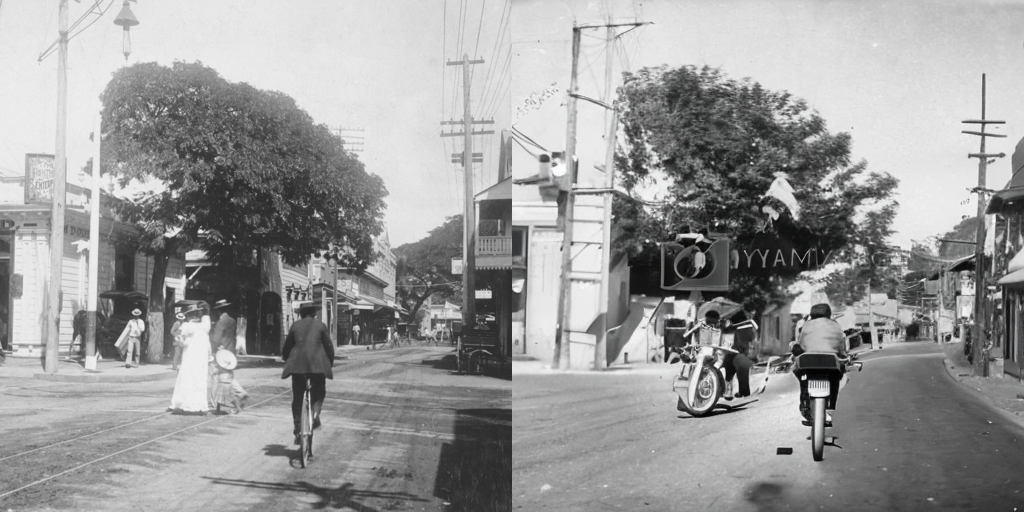

In [12]:
image1 = pipeline(prompt=prompt, image=init_image, negative_prompt=negative_prompt,  strength=0.7).images[0]
make_image_grid([init_image, image1], rows=1, cols=2)

  0%|          | 0/35 [00:00<?, ?it/s]

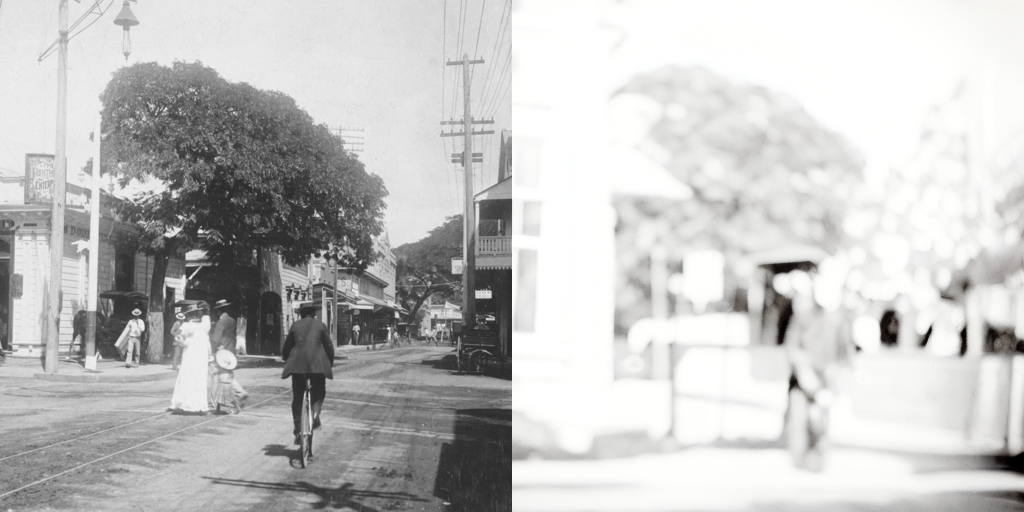

In [13]:
image2 = pipeline(prompt=prompt, image=init_image_tensor, negative_prompt=negative_prompt, depth_map=depth_map_single_channel,  strength=0.7).images[0]
make_image_grid([init_image, image2], rows=1, cols=2)